In [1]:
import pandas as pd

df = pd.read_csv("data/gender-index-data-2019-11-04.csv") 
print(df.shape)
df.head()

(5483666, 10)


,qid,dob,dod,gender,ethnic_group,citizenship,place_of_birth,field_of_work,occupation,site_links
0,Q23,1732,1799,Q6581097|,NaN,Q161885|Q30|,Q494413|,NaN,Q82955|Q189290|Q131512|Q1734662|Q294126|Q81096...,dewiki|hrwiki|uzwiki|ruwiki|plwiki|brwiki|afwi...
1,Q42,1952,2001,Q6581097|,Q42406|,Q145|,Q350|,NaN,Q214917|Q28389|Q6625963|Q4853732|Q18844224|Q24...,svwikiquote|frwikiquote|azwikiquote|enwikiquot...
2,Q1868,1868,1944,Q6581097|,NaN,Q31|,Q9005|,Q134995|Q21198|Q5962346|,Q36180|Q40348|Q182436|Q1265807|Q205375|Q10429346|,frwikisource|commonswiki|enwikisource|enwiki|d...
3,Q207,1946,-2147483648,Q6581097|,NaN,Q30|,Q49145|,NaN,Q82955|Q15982858|Q18814623|Q1028181|Q14089670|...,commonswiki|kowikisource|zhwikisource|enwikiso...
4,Q297,1599,1660,Q6581097|,NaN,Q39|Q600093|,Q8717|,NaN,Q1028181|,enwiki|itwiki|abwiki|afwiki|alswiki|anwiki|arw...


In [2]:
# take only those that have a wikipedia page in english
df = df[df.site_links.str.contains("enwiki", na=False)]
df.shape

(1676922, 10)

In [3]:
# select people born after 1850 - the date of the first person of the club 27
df = df[df.dob > 1850]
df.shape

(1287273, 10)

## Select the artists using the dictionary

In [4]:
# get a list from the dictionary of all the Q-occupation-codes that belong to artists
import json

# used to read gender and occupations dictionaries
def read_dictionary(path):
    with open(path) as json_file:
        line = json_file.readline()
        dictionary = json.loads(line)
    return dictionary

In [5]:
LOCAL_PATH = "./data/"
QCODE_FIELD_DICT = LOCAL_PATH + "dict_wikicode_to_field.json"

code_to_field = read_dictionary(QCODE_FIELD_DICT)  # Q123 -> Artist
code_to_field

{'Q14373094': 'Sports',
 'Q10349745': 'Sports',
 'Q42603': 'Religion',
 'Q118865': 'Artist',
 'Q28389': 'Artist',
 'Q3455803': 'Artist',
 'Q3621491': 'Scientist',
 'Q201788': 'Social Sciences',
 'Q2133309': 'Artist',
 'Q488111': 'Artist',
 'Q43845': 'Business & Law',
 'Q593644': 'Scientist',
 'Q753110': 'Artist',
 'Q1925963': 'Artist',
 'Q48146261': 'Artist',
 'Q11900058': 'Scientist',
 'Q11338576': 'Sports',
 'Q13382566': 'Sports',
 'Q899758': 'Artist',
 'Q212980': 'Scientist',
 'Q18074503': 'Artist',
 'Q2066131': 'Sports',
 'Q1281618': 'Artist',
 'Q81096': 'Scientist',
 'Q33231': 'Artist',
 'Q19204627': 'Sports',
 'Q948329': 'Artist',
 'Q13365117': 'Sports',
 'Q482980': 'Artist',
 'Q3282637': 'Artist',
 'Q486748': 'Artist',
 'Q13382576': 'Sports',
 'Q715301': 'Artist',
 'Q82955': 'Politics',
 'Q386854': 'Artist',
 'Q11063': 'Scientist',
 'Q15977509': 'Artist',
 'Q644687': 'Artist',
 'Q11513337': 'Sports',
 'Q15627169': 'Politics',
 'Q19729565': 'Artist',
 'Q2526255': 'Artist',
 'Q584

In [6]:
artist_codes = []
for code,field in code_to_field.items():
    if field == 'Artist':
        artist_codes.append(code)

type(artist_codes)

list

In [7]:
df['occupation'] = df['occupation'].apply(lambda d: d if isinstance(d, str) else "")
df['occupation'] = df['occupation'].str.split('|').map(lambda x: x[:-1])

In [8]:
# filter the artists 
art_mask = df.occupation.apply(lambda occupation: any(x in occupation for x in artist_codes))
df_artists = df[art_mask]


In [9]:
df_artists.shape

(333388, 10)

## plot the histogram of their age of death

In [10]:
# select the artists who are dead and compute their age
df_dead_artists = df_artists[df_artists.dod > 0]
df_dead_artists["age"] = df_dead_artists.dod - df_dead_artists.dob
df_dead_artists.shape

/home/sofia/Anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(134019, 11)

In [11]:
# remove artists with negative age - error in the data (dob > dod)
df_dead_artists = df_dead_artists[df_dead_artists.age > 0]
df_dead_artists.shape

(134003, 11)

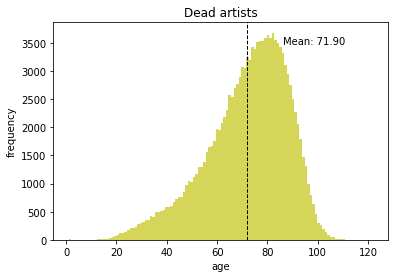

In [13]:
import matplotlib.pyplot as plt

plt.hist(df_dead_artists.age, bins=120, color='y', alpha=0.65)

# Add title and axis names
plt.title('Dead artists')
plt.xlabel('age')
plt.ylabel('frequency')

mean_age = df_dead_artists.age.mean()
plt.axvline(mean_age, color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(mean_age*1.2, max_ylim*0.9, 'Mean: {:.2f}'.format(mean_age));

plt.savefig("dead.png", bbox_inches=0, orientation='landscape', pad_inches=0.1)

In [26]:
# try only for the musicians
QCODE_MUSIC_DICT = LOCAL_PATH + "dict_wikicode_to_musician.json"

code_to_field = read_dictionary(QCODE_MUSIC_DICT)  # Q123 -> musician
music_codes = []
for code,field in code_to_field.items():
    if field == 'Musician':
        music_codes.append(code)

type(music_codes)

list

In [27]:
# filter the musicians 
musicians_mask = df_dead_artists.occupation.apply(lambda occupation: any(x in occupation for x in music_codes))
df_dead_musicians = df_dead_artists[musicians_mask]

In [28]:
df_dead_musicians.shape

(30520, 11)

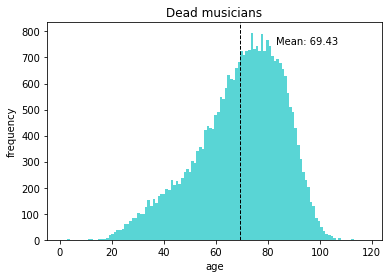

In [36]:
plt.hist(df_dead_musicians.age, bins=118, color='c', alpha=0.65)

# Add title and axis names
plt.title('Dead musicians')
plt.xlabel('age')
plt.ylabel('frequency')

mean_age = df_dead_musicians.age.mean()
plt.axvline(mean_age, color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(mean_age*1.2, max_ylim*0.9, 'Mean: {:.2f}'.format(mean_age));

plt.savefig("dead.png", bbox_inches=0, orientation='landscape', pad_inches=0.1)

## Plot for all the different art occupations 

- literature, visual, scultpure, performance, music

In [38]:
df_art_occupations = pd.read_csv('./data/art_occupations.csv', sep='\t')
df_art_occupations.head()

,Unnamed: 0,wikicode,occupation,art_field
0,0,Q118865,clarinetist,music
1,1,Q28389,screenwriter,literature
2,2,Q3455803,director,performance
3,3,Q2133309,interior designer,sculpture
4,4,Q488111,pornographic actor,performance


In [40]:
art_fields = list(df_art_occupations.art_field.unique())

['music', 'literature', 'performance', 'sculpture', 'visual']

In [47]:
dict_art_field_df = {}

for art_field in art_fields:
    
    # filter the artists according to their category
    
    # select the wikicodes corresponding to each art field
    art_codes = df_art_occupations[df_art_occupations.art_field == art_field].wikicode.tolist()
    
    # filter the artists according to their occupation
    art_mask = df_dead_artists.occupation.apply(lambda occupation: any(x in occupation for x in art_codes))
    df_dead = df_dead_artists[art_mask]
    
    dict_art_field_df[art_field] = df_dead
    
    print(art_field, df_dead.shape)

music (30661, 11)
literature (48940, 11)
performance (39045, 11)
sculpture (9609, 11)
visual (25729, 11)


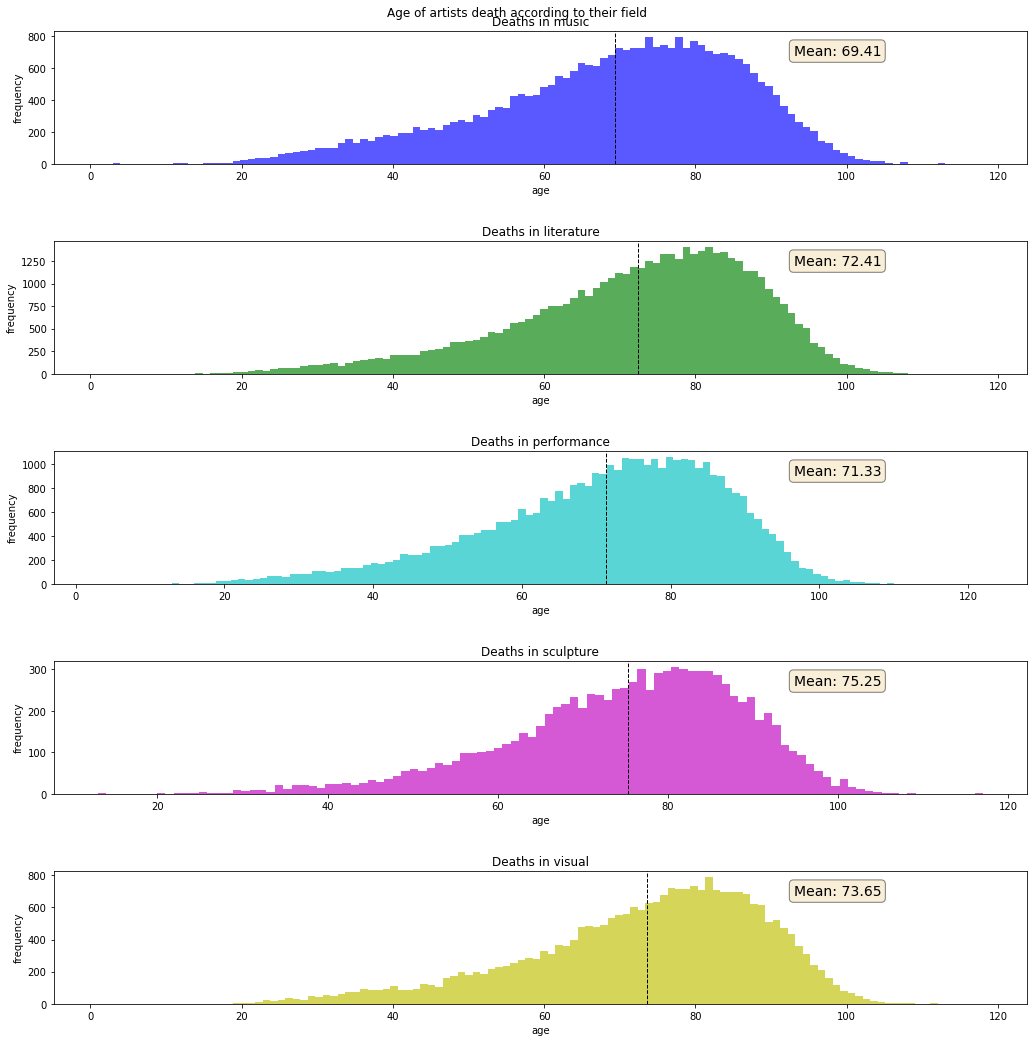

In [107]:
###### plot + save their histogram with age distributions
colors = ['b', 'g', 'c', 'm', 'y']
bins = {'music': 118, 'literature': 118, 'performance': 120, 'sculpture': 105, 'visual': 118}

fig, axs = plt.subplots(5, figsize=(15, 15))
fig.suptitle('Age of artists death according to their field')

for idx, art in enumerate(art_fields):
    axs[idx].hist(dict_art_field_df[art].age, bins=bins[art], color=colors[idx], alpha=0.65)
    axs[idx].set_title('Deaths in '+str(art))
    axs[idx].set_xlabel('age')
    axs[idx].set_ylabel('frequency')
    
    mean_age = dict_art_field_df[art].age.mean()
    axs[idx].axvline(mean_age, color='k', linestyle='dashed', linewidth=1)

    min_ylim, max_ylim = plt.ylim()
#     axs[idx].text(mean_age*1.2, max_ylim*0.9, 'Mean: {:.2f}'.format(mean_age));
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    axs[idx].text(0.76, 0.9, 'Mean: {:.2f}'.format(mean_age), transform=axs[idx].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)


plt.tight_layout(pad=3.0)